In [180]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [181]:
mu_max=0.092
k_x=0.15
mu_p=0.005
K_p=0.0002
K_1=0.1
kappa=0.04
y_xs=0.45
#y_ps=0.9
m=0.022
V=80000
c_oil=1000
F_oil=30
c_s=600
F_s=80


Text(0.5, 1.0, 'Haldane coefficient in terms of X (S steadystate)')

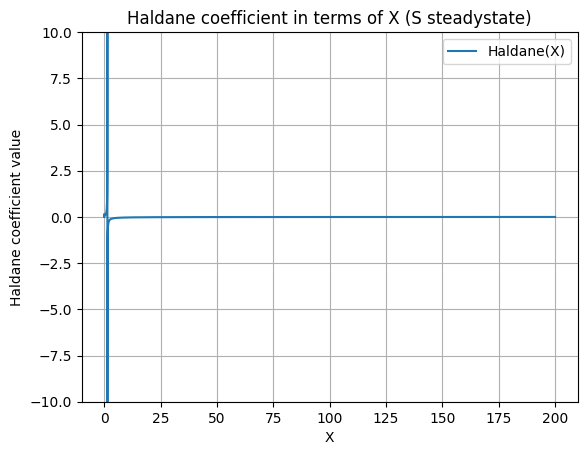

In [182]:
mx=0.022
def fun(X):
    s = (-k_x * y_xs * X * (m * V * X - c_oil * F_oil + c_s * F_s)) / (V * mu_max * X + y_xs * (m * V * X - c_oil * F_oil + c_s * F_s))
    return 0.05*(s / (K_p + s + s**2 / K_1))
    #return s

T=np.linspace(0,200,100000)

plt.plot(T,fun(T),label='Haldane(X)')
plt.ylim(-10,10)
#plt.xlim(0,6)
#plt.plot(T,T*0,label='baseline y=0', linestyle ='dashed')
plt.legend()
plt.grid()
plt.xlabel('X')
plt.ylabel('Haldane coefficient value')
plt.title('Haldane coefficient in terms of X (S steadystate)')
#plt.savefig('haldane.jpg')

0


C:\Users\rasmchr\AppData\Local\Temp\ipykernel_10568\2659637638.py:29: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  solution = odeint(model, initial_conditions, t, args=(mu_max, mu_p, k_x, y_xs, K_p, V, K_1, kappa, c_s, c_oil, m))
C:\Users\rasmchr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\ticker.py:2096: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


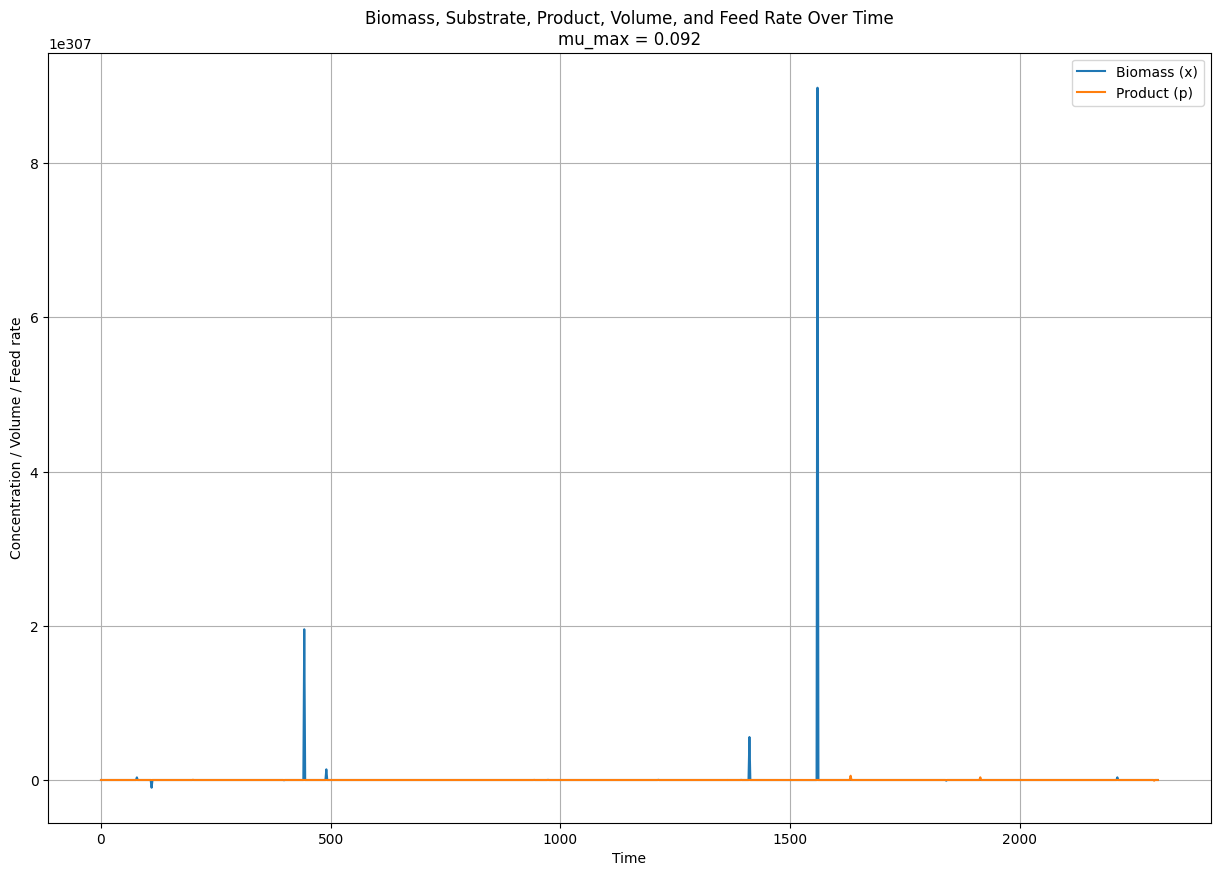

In [183]:
def model(variables, t, mu_max, mu_p, k_x, y_xs, K_p, V, K_1, kappa, c_s, c_oil, m):
    x, p = variables

    #F_s = 0.3
    #F_oil = 0.3
    #F = c_s*F_s + c_oil*F_oil
    s = (-k_x * y_xs * x * (m * V * x - c_oil * F_oil + c_s * F_s)) / (V * mu_max * x + y_xs * (m * V * x - c_oil * F_oil + c_s * F_s))
    
    #V_delta = np.exp(0.0095*t)

    # Defining the system of equations
    dxdt = mu_max * (s / (k_x*x + s)) * x
    dpdt = x*mu_p*(s/(K_p+s+s**2/K_1)) - kappa*p
    #dVdt = 0.0095*np.exp(0.0095*t)
    return [dxdt, dpdt]

# Initial conditions
x0 = 1.13   # Initial biomass concentration
p0 = 0.0   # Initial product concentration

initial_conditions = [x0, p0]

# Time points
t = np.linspace(0, 2300, 1150)

plt.figure(figsize=(15, 10))
for i in range(1):
    print(i)
    solution = odeint(model, initial_conditions, t, args=(mu_max, mu_p, k_x, y_xs, K_p, V, K_1, kappa, c_s, c_oil, m))

    # Extract solutions for x (biomass), s (substrate), p (product), and V (volume)
    x_sol = solution[:, 0]
    p_sol = solution[:, 1]
    

    # Plot biomass, substrate, product, and volume
    plt.plot(t, x_sol, label='Biomass (x)')#, color='green')
    plt.plot(t, p_sol, label='Product (p)')#, color='blue')

    # Plot feed rate
    plt.xlabel('Time')
    plt.ylabel('Concentration / Volume / Feed rate')
    plt.legend()
    plt.title(f'Biomass, Substrate, Product, Volume, and Feed Rate Over Time\nmu_max = {mu_max}')
    plt.grid(True)
    plt.show()
    #mu_max =+ mu_max + mu_max*0.4

C:\Users\rasmchr\AppData\Local\Temp\ipykernel_10568\1968262664.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "yo" (-> color='y'). The keyword argument will take precedence.
  plt.plot(44.31818181818182, 0, 'yo', color='red', label = 'Fixed point in X')


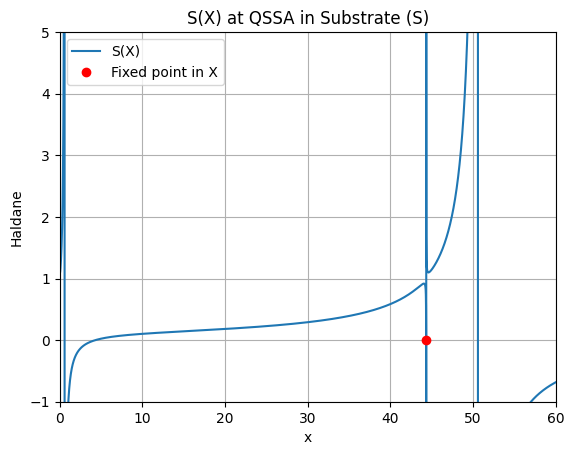

C:\Users\rasmchr\AppData\Local\Temp\ipykernel_10568\1968262664.py:52: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "yo" (-> color='y'). The keyword argument will take precedence.
  plt.plot(44.31818181818182, 0, 'yo', color='red', label = 'Fixed point in X')


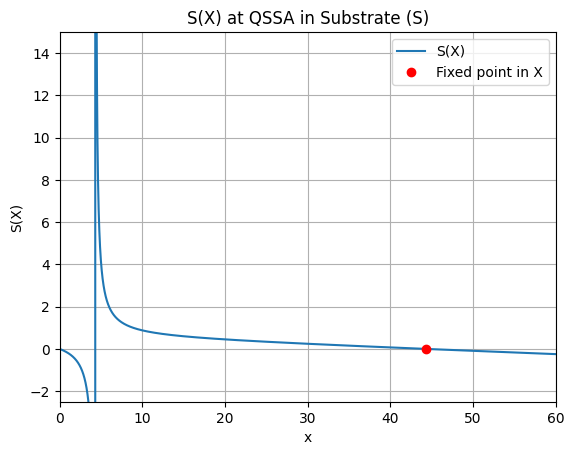

44.31818181818182


<Figure size 640x480 with 0 Axes>

In [184]:
#mx=0.022
def fun_s(x):
    F = c_s*F_s + c_oil*F_oil
    alpha = m*V*y_xs
    beta = F*y_xs
    #print(beta)
    #print(alpha)
    #print(beta/alpha)
    #print(mu_max)
    #print(V)
    s = (-alpha*k_x*x**2 + beta*k_x*x)/(alpha*x + mu_max*V*x - beta)
    return s

def fun_hallie(x):
    F = c_s*F_s + c_oil*F_oil
    alpha = m*V*y_xs
    beta = F*y_xs
    #print(beta)
    #print(alpha)
    #print(beta/alpha)
    #print(mu_max)
    #print(V)
    s = (-alpha*k_x*x**2 + beta*k_x*x)/(alpha*x + mu_max*V*x - beta)
    return (s / (K_p + s * (1 + s / K_1)))# - kappa*x



T=np.linspace(0,60,1000000)

plt.plot(T,fun_hallie(T),label='S(X)')
plt.ylim(-5,50)
plt.xlim(0,60)
#plt.plot(T,T*0,label='baseline y=0', linestyle ='dashed')
plt.grid()
plt.xlabel('x')
plt.ylabel('Haldane')
plt.title('S(X) at QSSA in Substrate (S)')
#plt.title('Haldane term at QSSA in Substrate (s)')
plt.plot(44.31818181818182, 0, 'yo', color='red', label = 'Fixed point in X')
plt.legend()

#plt.xlim(0,6)
plt.ylim(-1,5)
#plt.xlim(44, 45)

plt.show()

plt.plot(T,fun_s(T),label='S(X)')
plt.ylim(-2.5,15)
plt.xlim(0,60)
plt.grid()
plt.plot(44.31818181818182, 0, 'yo', color='red', label = 'Fixed point in X')
plt.xlabel('x')
plt.title('S(X) at QSSA in Substrate (S)')
plt.ylabel('S(X)')
plt.legend()

plt.show()

#plt.ylim(0,10)
#plt.savefig('haldane.jpg')


#plt.xlim(0, 2)
#plt.xlim(42,45)
#plt.arrow(44, 5, -12, 13, width=0.1, color="k", 
#             head_width=6, head_length=5, overhang=.6)

#plt.grid()
#x_zoom = np.linspace(43, 46, 50000)
#y_zoom = fun1(x_zoom)
#axes = plt.axes([.20, .55, .30, .25])
#axes.plot(x_zoom, y_zoom, c='green', lw=1, label="Zoomed curve")


# plt.ylim(-3,10)
#plt.grid()
#axes.legend()

plt.savefig('s(x)_at_QSSA_in_Substrate_(s).png', format='png', dpi=800)
#plt.savefig('Haldane_coef.png', format='png', dpi=1200)
F = c_s*F_s + c_oil*F_oil
alpha = m*V*y_xs
beta = F*y_xs
print(beta/alpha)

In [185]:
beta/(alpha+mu_max*V)

4.305691854759568

<function matplotlib.pyplot.xlim(*args, **kwargs) -> 'tuple[float, float]'>

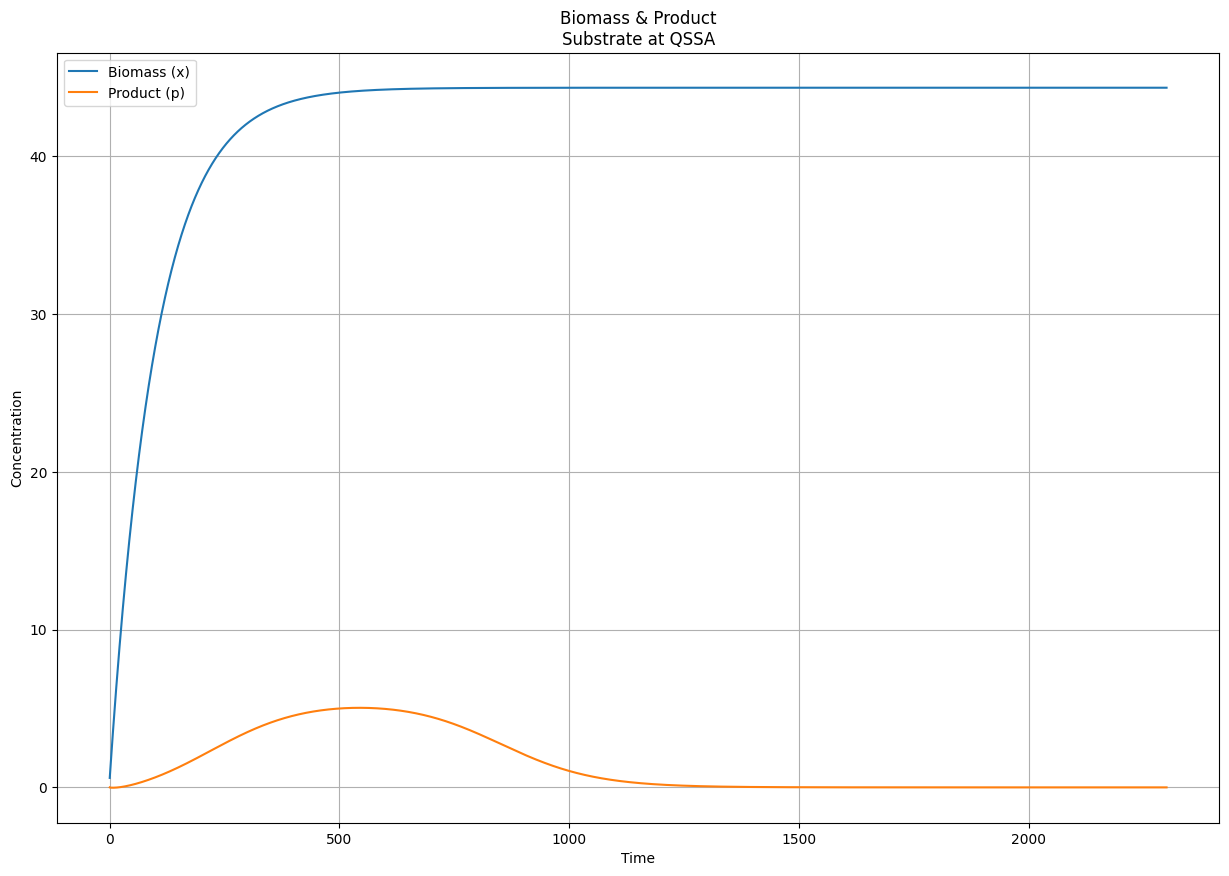

In [188]:
def model1(variables, t, mu_max, mu_p, k_x, y_xs, K_p, V, K_1, kappa, c_s, c_oil, m):
    x, p = variables

    #F_s = 0.3
    #F_oil = 0.3
    F = c_s*F_s + c_oil*F_oil
    #print(F)
    alpha = m*V*y_xs
    beta = F*y_xs
    #print(beta)
    #s = (-alpha*k_x*x**2 + beta*k_x*x)/(alpha*x + mu_max*V*x - beta)
    s = fun_s(x)#
    #V_delta = np.exp(0.0095*t)
    
    # Defining the system of equations
    #s = fun1(x)
    dxdt = mu_max * (s / (k_x*x + s)) * x
    dpdt = x*mu_p*(s / (K_p + s * (1 + s / K_1))) - kappa*p
    #dVdt = 0.0095*np.exp(0.0095*t)
    return [dxdt, dpdt]

# Initial conditions
x0 = 0.6#.3306#.31818181817567
   # Initial biomass concentration
p0 = 0.0   # Initial product concentration

initial_conditions = [x0, p0]

# Time points
t = np.linspace(0, 2300, 11050)

plt.figure(figsize=(15, 10))
empty_list = []
solution = odeint(model1, initial_conditions, t, args=(mu_max, mu_p, k_x, y_xs, K_p, V, K_1, kappa, c_s, c_oil, m))
# Extract solutions for x (biomass), s (substrate), p (product), and V (volume)
x_sol = solution[:, 0]
p_sol = solution[:, 1]
#s = solution[:, 2]

# Plot biomass, substrate, product, and volume
plt.plot(t, x_sol, label='Biomass (x)')#, color='green')
plt.plot(t, p_sol, label='Product (p)')#, color='blue')
# Plot feed rate
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.title(f'Biomass & Product\nSubstrate at QSSA')
plt.grid(True)
#plt.show()
#mu_max =+ mu_max + mu_max*0.4
#plt.savefig('2d_substrateQSSA_solutions.png', format='png', dpi=600)
x_sol[-1]
plt.xlim

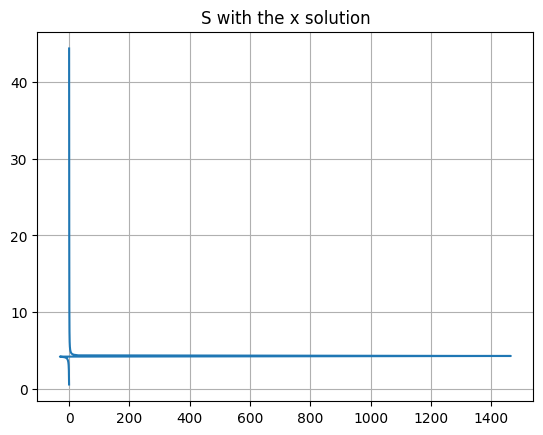

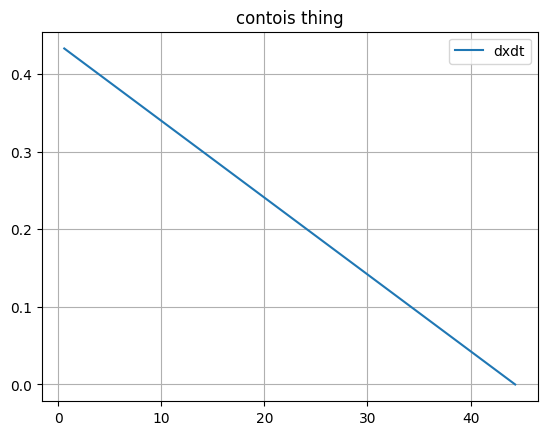

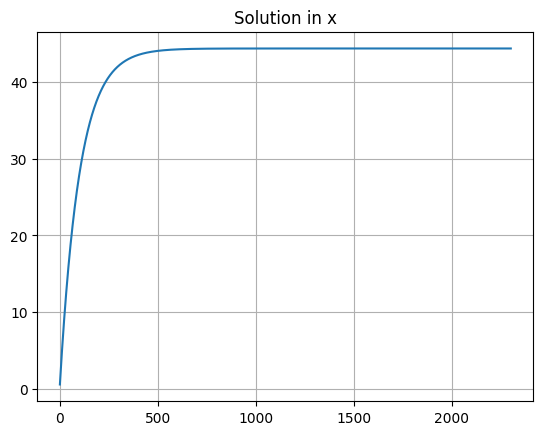

In [197]:
s_sol = []
for i in range(len(x_sol)):
    s_sol.append(fun_s(x_sol[i]))

contois = []
for j in range(len(s_sol)):
    contois.append((mu_max * (s_sol[j] / (k_x*x_sol[j] + s_sol[j])))*x_sol[j])

plt.plot(s_sol, x_sol)
plt.grid()
plt.title('S with the x solution')
#plt.ylim(-10,10)
#plt.xlim(-10,50)
plt.show()

plt.plot(x_sol, contois, label = 'dxdt')
plt.grid()
plt.title('contois thing')
plt.legend()
plt.show()

plt.plot(t, x_sol, label = 'dxdt')
plt.grid()
plt.title('Solution in x')
plt.show()